In [1]:
import pandas as pd

data = pd.read_csv('Dementia.csv')

data.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [3]:
data['dementia_all'].value_counts()

dementia_all
0    1726
1     116
Name: count, dtype: int64

In [4]:
data['dementia'].value_counts()

dementia
0.0    1726
1.0      82
Name: count, dtype: int64

In [5]:
data['dementia_all'] = data['dementia_all'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   object 
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [6]:
data = data.dropna(axis=0, how='any')
data.isnull().sum()

ID                      0
age                     0
gender                  0
dementia                0
dementia_all            0
educationyears          0
EF                      0
PS                      0
Global                  0
diabetes                0
smoking                 0
hypertension            0
hypercholesterolemia    0
lacunes_num             0
fazekas_cat             0
study                   0
study1                  0
SVD Simple Score        0
SVD Amended Score       0
Fazekas                 0
lac_count               0
CMB_count               0
dtype: int64

In [7]:
data.shape

(923, 22)

In [8]:
# identificar columnas categóricas
cols_obj = data.select_dtypes(include='object').columns

# codificar in-place
for col in cols_obj:
    data[col], _ = pd.factorize(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 1840
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    923 non-null    int64  
 1   age                   923 non-null    float64
 2   gender                923 non-null    int64  
 3   dementia              923 non-null    float64
 4   dementia_all          923 non-null    int64  
 5   educationyears        923 non-null    float64
 6   EF                    923 non-null    float64
 7   PS                    923 non-null    float64
 8   Global                923 non-null    float64
 9   diabetes              923 non-null    int64  
 10  smoking               923 non-null    int64  
 11  hypertension          923 non-null    int64  
 12  hypercholesterolemia  923 non-null    int64  
 13  lacunes_num           923 non-null    int64  
 14  fazekas_cat           923 non-null    int64  
 15  study                 923 n

In [9]:
# Separamos los datos para entrenar los modelos
from sklearn.model_selection import train_test_split
# Preparación de datos para entrenamiento
X = data.drop('dementia_all', axis=1)
y = data['dementia_all']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define los parámetros 
param_grid_knn = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Inicializa el clasificador 
knn = KNeighborsClassifier()

# Inicializa GridSearchCV 
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Aplica GridSearchCV en los datos de entrenamiento
grid_search_knn.fit(X_train_scaled, y_train)

# acceder al modelo
best_knn_model = grid_search_knn.best_estimator_
best_knn_model

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [12]:
# predicciones
best_knn_model.predict(X_test)

C:\Users\Diego\anaconda3\envs\gpu_env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

C:\Users\Diego\anaconda3\envs\gpu_env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


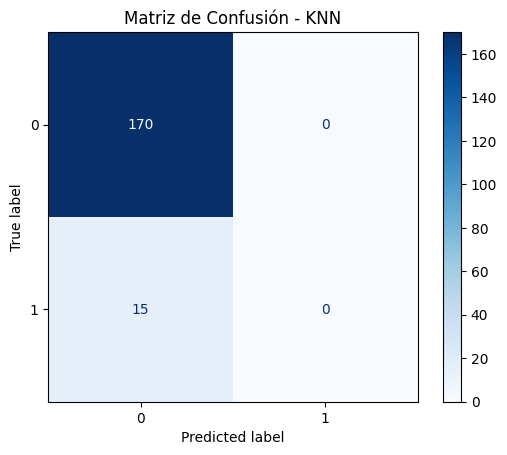

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# predicciones
y_pred = best_knn_model.predict(X_test)

# matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN")
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Espacio de búsqueda bayesiano
param_space_knn = {
    'n_neighbors': Integer(3, 15),
    'weights': Categorical(['uniform', 'distance']),
    'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
}

# Clasificador base
knn = KNeighborsClassifier()

# Búsqueda bayesiana
bayes_search_knn = BayesSearchCV(
    estimator=knn,
    search_spaces=param_space_knn,
    n_iter=30,        # número de evaluaciones
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Ajuste
bayes_search_knn.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_knn_model = bayes_search_knn.best_estimator_
best_knn_model


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


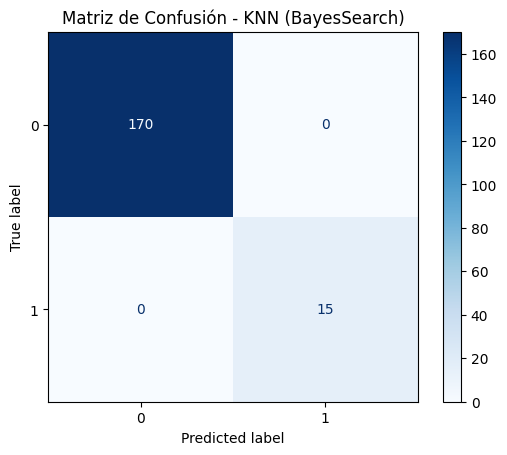

[[170   0]
 [  0  15]]


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
y_pred = best_knn_model.predict(X_test_scaled)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - KNN (BayesSearch)")
plt.show()

# Si la quieres en forma numérica:
print(cm)
